In [3]:
import pandas as pd

train_data = pd.read_csv('C:/Users/MaxB2/Documents/Machine_Is_Learning/titanic_train.csv')

In [5]:
"""Goal: “what sorts of people were more likely to survive?” """

"""
Variable	Definition	            Key                         Variable Notes

survival	Survival	            0 = No, 1 = Yes
pclass	    Ticket class	        1 = 1st, 2 = 2nd, 3 = 3rd
                                                                A proxy for socio-economic status (SES)
                                                                1st = Upper
                                                                2nd = Middle
                                                                3rd = Lower

sex	        Sex	
Age	        Age in years	                                    fractional if less than 1. If estimated, is it in the form of xx.5
                                                                
sibsp	    # of siblings / spouses aboard the Titanic	        sibsp: The dataset defines family relations in this way...
                                                                Sibling = brother, sister, stepbrother, stepsister
                                                                Spouse = husband, wife (mistresses and fiancés were ignored)

parch	    # of parents / children aboard the Titanic	        parch: The dataset defines family relations in this way...
                                                                Parent = mother, father
                                                                Child = daughter, son, stepdaughter, stepson
                                                                Some children travelled only with a nanny, therefore parch=0 for them.
ticket	    Ticket number	
fare	    Passenger fare	
cabin	    Cabin number	
embarked	Port of Embarkation	    C = Cherbourg, Q = Queenstown, S = Southampton


Variable Notes





"""

"""
Assign survived --> target

Drop Passenger ID Instantly
Drop Name Instantly

Cabin? -->  Refers to a certain position on the ship?
            Might be separated?
            drop first, but logically could be important --> separate analysis?
Ticket Number? -->  Any valuable information?
                    If not, drop instantly

transform sex into 0=male 1=female
transform cabin 0=NaN 1=number
transfor embarked into 1hm
make a decision for NaN treatment of age


correlation matrix / heatmap afterwards
"""


'\nDrop Name Instantly\nDrop Name Instantly\n\nCabin? -->  Refers to a certain position on the ship?\n            Might be separated?\nTicket Number? -->  Any valuable information?\n                    If not, drop instantly\n'

In [53]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [51]:
for column in train_data.columns:
    nan_count = train_data[column].isna().sum()
    print(column, "NaN count: ",nan_count)

PassengerId NaN count:  0
Survived NaN count:  0
Pclass NaN count:  0
Name NaN count:  0
Sex NaN count:  0
Age NaN count:  177
SibSp NaN count:  0
Parch NaN count:  0
Ticket NaN count:  0
Fare NaN count:  0
Cabin NaN count:  687
Embarked NaN count:  2


In [108]:
columns_to_drop = ['PassengerId', 'Name',"Ticket"]
train_data_numerical = train_data.drop(columns_to_drop, axis=1)
train_data_numerical["Age"].fillna(train_data_numerical["Age"].median(),inplace=True)
train_data_numerical = train_data_numerical.dropna(subset=["Embarked"])
train_data_numerical["Cabin"] = train_data_numerical["Cabin"].fillna(0).astype(bool).astype(int) # 0 NaN 1 non-NaN
train_data_numerical["Sex"] = train_data_numerical['Sex'].map({'male': 0, 'female': 1}) # 0 male 1 female

print(type(train_data_numerical))

from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()
embarked = train_data_numerical[["Embarked"]]
embarked_1hot = (OHE.fit_transform(embarked)).toarray()

print(embarked_1hot)

# Create new columns for each category
for i, category in enumerate(OHE.categories_[0]):
    column_name = f"Embarked_{category}"
    train_data_numerical[column_name] = embarked_1hot[:, i]

print(train_data_numerical.head(10))
train_data_numerical = train_data_numerical.drop("Embarked",axis=1)
print(train_data_numerical.head(10))

print("===NAN COUNTER===")
for column in train_data_numerical.columns:
    nan_count = train_data_numerical[column].isna().sum()
    print(column, "NaN count: ",nan_count)


<class 'pandas.core.frame.DataFrame'>
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Cabin Embarked  \
0         0       3    0  22.0      1      0   7.2500      0        S   
1         1       1    1  38.0      1      0  71.2833      1        C   
2         1       3    1  26.0      0      0   7.9250      0        S   
3         1       1    1  35.0      1      0  53.1000      1        S   
4         0       3    0  35.0      0      0   8.0500      0        S   
5         0       3    0  28.0      0      0   8.4583      0        Q   
6         0       1    0  54.0      0      0  51.8625      1        S   
7         0       3    0   2.0      3      1  21.0750      0        S   
8         1       3    1  27.0      0      2  11.1333      0        S   
9         1       2    1  14.0      1      0  30.0708      0        C   

   Embarked_C  Embarked_Q  Embarked_S  
0         0.0         0.0         1.0  


Survived      1.000000
Sex           0.541585
Cabin         0.313435
Fare          0.255290
Embarked_C    0.169966
Parch         0.083151
Embarked_Q    0.004536
SibSp        -0.034040
Age          -0.069822
Embarked_S   -0.151777
Pclass       -0.335549
Name: Survived, dtype: float64


<Axes: >

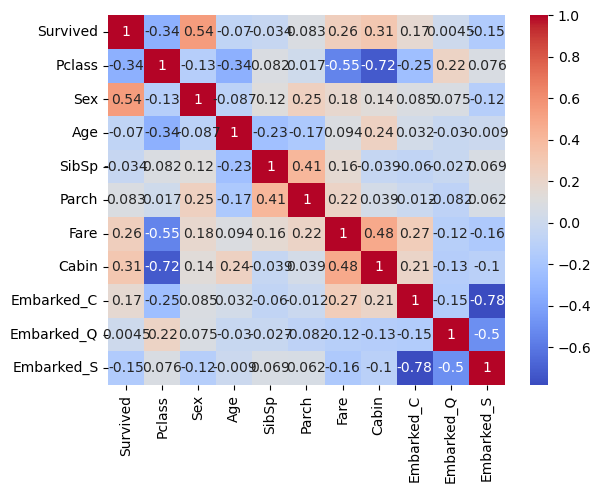

In [109]:
corr_matrix = train_data_numerical.corr()
print(corr_matrix["Survived"].sort_values(ascending=False))
# Create a heatmap using the DataFrame
import seaborn as sns
# create heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [110]:
"""The knowledge about the cabin is good for predictions on the next dataset
since it is more likely that a survivor can provide his cabin number after
wards, but does not necessarily say something about the person itself,because
we have no key for the location of the respective cabins (research)"""


"""
Continue with:

1   Which model has the best raw results / standardized results
2   Optimize this model using GridSearch
"""

X_train = train_data_numerical.drop("Survived",axis=1)
y_train = train_data_numerical["Survived"]
print(X_train, y_train)



     Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked_C  Embarked_Q  \
0         3    0  22.0      1      0   7.2500      0         0.0         0.0   
1         1    1  38.0      1      0  71.2833      1         1.0         0.0   
2         3    1  26.0      0      0   7.9250      0         0.0         0.0   
3         1    1  35.0      1      0  53.1000      1         0.0         0.0   
4         3    0  35.0      0      0   8.0500      0         0.0         0.0   
..      ...  ...   ...    ...    ...      ...    ...         ...         ...   
886       2    0  27.0      0      0  13.0000      0         0.0         0.0   
887       1    1  19.0      0      0  30.0000      1         0.0         0.0   
888       3    1  28.0      1      2  23.4500      0         0.0         0.0   
889       1    0  26.0      0      0  30.0000      1         1.0         0.0   
890       3    0  32.0      0      0   7.7500      0         0.0         1.0   

     Embarked_S  
0           1.0  
1  

In [120]:
"""1"""
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

from sklearn.svm import SVC
svc = SVC()
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()


print("SVC Scaled Score: ", round((cross_val_score(svc,X_train_scaled,y_train,cv=3, scoring="accuracy")).mean(),2))
print("SGD Scaled Score: ", round((cross_val_score(sgd,X_train_scaled,y_train,cv=3, scoring="accuracy")).mean(),2))
print("DTC Scaled Score: ", round((cross_val_score(dtc,X_train_scaled,y_train,cv=3, scoring="accuracy")).mean(),2))
print("KNN Scaled Score: ", round((cross_val_score(knn,X_train_scaled,y_train,cv=3, scoring="accuracy")).mean(),2))



SVC Scaled Score:  0.82
SGD Scaled Score:  0.77
DTC Scaled Score:  0.76
KNN Scaled Score:  0.79


In [132]:
X_train_scaled.shape

(889, 10)

In [133]:
y_train.shape


(889,)

In [136]:
"""2"""
from sklearn.model_selection import GridSearchCV as GS

from sklearn.metrics.pairwise import rbf_kernel

X_train_kernel = rbf_kernel(X_train_scaled)  # Compute the RBF kernel matrix



param_grid = [
    {
        "C": [1.0, 1.5, 2.0, 2.5, 3.0],
        "kernel": ['linear', 'precomputed']
        },
    {
        "C": [1.0, 1.5, 2.0, 2.5, 3.0],
        "kernel": ['poly', 'rbf', 'sigmoid'],
        "gamma": ['scale', 'auto', 50, 100, 200, 500, 1500]
    }
]

grid_search = GS(svc,
                 param_grid,
                 cv=3,
                 scoring="neg_mean_squared_error",
                 return_train_score=True
)

"""The Best Params"""
grid_search.fit(X_train_kernel, y_train) # Takes a while
best_parameters = grid_search.best_params_
print("Best Paramaters: ", best_parameters)
best_estimator = grid_search.best_estimator_
print("Best Estimators: ",best_estimator)

"""Printing Combinations And Respective Results"""
print("Combinations And Respective Results")
cvres = grid_search.cv_results_
for mean_score, params in zip (cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)